# Proyek: Air Quality Predictive Analytics

# Latar Belakang

Kualitas udara menjadi salah satu indikator penting dalam menjaga kesehatan masyarakat dan kelestarian lingkungan, terutama di daerah perkotaan yang padat penduduk dan memiliki tingkat polusi yang tinggi. Peningkatan aktivitas manusia, seperti transportasi, industri, dan pembakaran bahan bakar fosil, berkontribusi signifikan terhadap pencemaran udara. Hal ini menyebabkan peningkatan konsentrasi polutan seperti CO, PM10, PM2.5, O₃, dan NO₂, yang secara langsung memengaruhi kesehatan manusia dan lingkungan.

Beberapa isu utama yang melatarbelakangi pentingnya proyek ini:
1. Dampak Kesehatan:
Paparan polutan udara dapat menyebabkan berbagai masalah kesehatan, termasuk penyakit pernapasan, kardiovaskular, dan bahkan kematian dini. World Health Organization (WHO) telah menyatakan bahwa kualitas udara yang buruk merupakan salah satu ancaman kesehatan global.
2. Dampak Lingkungan:
Polutan seperti ozon dan nitrogen dioksida tidak hanya berdampak pada kesehatan manusia tetapi juga menyebabkan kerusakan lingkungan, seperti penurunan kualitas tanah dan air serta gangguan ekosistem.

# Business Understanding

## Problem Statements

Dengan meningkatnya polusi udara di daerah perkotaan, diperlukan sistem yang dapat memprediksi kualitas udara.

## Goals

Memprediksi nilai AQI (Air Quality Index) berdasarkan parameter polusi udara menggunakan machine learning.

## Solutions

1. Pemrosesan Data:
Melakukan normalisasi menggunakan metode Min-Max Scaling untuk memastikan semua parameter berada dalam skala yang sama.
Membagi data menjadi subset pelatihan dan validasi untuk menghindari overfitting.
2. Pemilihan Model:
Menggunakan model Neural Networks (CNN + LSTM) untuk menangkap pola temporal.
Memanfaatkan teknik dropout untuk menghindari overfitting.
3. Evaluasi Model:
Menggunakan Mean Absolute Error (MAE) sebagai metrik evaluasi utama.
Membandingkan prediksi model dengan data aktual melalui visualisasi.

# Datasets

Dataset yang digunakan berisi data kualitas udara harian Chicago-Naperville-Elgin, IL-IN-WI dari tahun 2015-2024 dengan fitur-fitur sebagai berikut:
- Overall AQI Value: Indeks kualitas udara yang mencerminkan tingkat risiko kesehatan.
- CO (Karbon Monoksida): Konsentrasi gas CO dalam udara.
- Ozon (O₃): Konsentrasi gas ozon.
- PM10: Partikel udara dengan diameter ≤ 10 µm.
- PM2.5: Partikel udara dengan diameter ≤ 2.5 µm.
- NO₂ (Nitrogen Dioksida): Konsentrasi gas nitrogen dioksida.

Sumber dataset : https://www.epa.gov/outdoor-air-quality-data/air-quality-index-daily-values-report

# Import Library

Langkah pertama adalah mengimpor pustaka yang diperlukan untuk memproses data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Conv1D

# Load Data

Tahap ini merupakan proses membaca file CSV dan mengubahnya menjadi DataFrame pandas.

In [2]:
df = pd.read_csv('aqidaily.csv', sep=';')

df

,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),CO,Ozone,PM10,PM25,NO2
0,1/1/2015,49,PM2.5,Gary-IITRI/ 1219.5 meters east of Tennessee St...,18-089-0022,AQS,5.0,26,19,49,22.0
1,1/2/2015,60,PM2.5,Gary-IITRI/ 1219.5 meters east of Tennessee St...,18-089-0022,AQS,9.0,26,19,60,47.0
2,1/3/2015,71,PM2.5,MAYFAIR PUMP STATION,17-031-0052,AQS,9.0,10,25,71,31.0
3,1/4/2015,71,PM2.5,Gary-IITRI/ 1219.5 meters east of Tennessee St...,18-089-0022,AQS,8.0,31,19,71,43.0
4,1/5/2015,52,PM2.5,Gary-IITRI/ 1219.5 meters east of Tennessee St...,18-089-0022,AQS,6.0,28,25,52,41.0
...,...,...,...,...,...,...,...,...,...,...,...
3629,12/8/2024,48,PM2.5,CARY GROVE HS,17-111-0001,AirNow,NaN,24,18,48,NaN
3630,12/9/2024,49,PM2.5,VILLAGE GARAGE,17-031-0001,AirNow,NaN,20,16,49,NaN
3631,12/10/2024,52,PM2.5,Gary-IITRI/ 1219.5 meters east of Tennessee St...,18-089-0022,AirNow,NaN,23,30,52,NaN
3632,12/11/2024,39,PM2.5,VILLAGE GARAGE,17-031-0001,AirNow,NaN,24,25,39,NaN


Berikut merupakan proses mengubah format tanggal, mengatur indeks, dan membuang kolom yang tidak relevan. Tahapan ini bertujuan untuk mempersiapkan data sebelum analisis lebih lanjut, khususnya untuk data berbasis waktu. Dengan langkah-langkah tersebut, data menjadi lebih terstruktur, relevan, dan siap digunakan untuk eksplorasi dan model pelatihan.

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.drop(columns=['Main Pollutant','Site Name (of Overall AQI)','Site ID (of Overall AQI)','Source (of Overall AQI)'])
df.head()

,Overall AQI Value,CO,Ozone,PM10,PM25,NO2
Date,,,,,,
2015-01-01,49,5.0,26,19,49,22.0
2015-01-02,60,9.0,26,19,60,47.0
2015-01-03,71,9.0,10,25,71,31.0
2015-01-04,71,8.0,31,19,71,43.0
2015-01-05,52,6.0,28,25,52,41.0


# Exploratory Data Analysis (EDA)

## Info Data

Langkah ini bertujuan untuk memahami struktur dataset, termasuk jumlah baris, kolom, tipe data, dan nilai non-null di setiap kolom.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3634 entries, 2015-01-01 to 2024-12-12
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Overall AQI Value  3634 non-null   int64  
 1   CO                 3535 non-null   float64
 2   Ozone              3634 non-null   int64  
 3   PM10               3634 non-null   int64  
 4   PM25               3634 non-null   int64  
 5   NO2                3592 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 198.7 KB


In [5]:
df.describe()

,Overall AQI Value,CO,Ozone,PM10,PM25,NO2
count,3634.000000,3535.000000,3634.000000,3634.000000,3634.000000,3592.000000
mean,64.207210,5.742574,46.587507,32.078426,58.006054,33.318486
std,21.900288,2.913570,25.624148,15.102190,15.023515,11.017437
min,24.000000,0.000000,10.000000,5.000000,22.000000,7.000000
25%,52.000000,3.000000,31.000000,21.000000,51.000000,26.000000
50%,59.000000,5.000000,40.000000,29.000000,57.000000,32.000000
75%,70.000000,7.000000,49.000000,41.000000,64.000000,40.000000
max,246.000000,24.000000,197.000000,117.000000,246.000000,96.000000


## Checking Missing Value

Langkah ini untuk memeriksa apakah ada nilai yang hilang (missing value) di dataset. Missing value dapat mengurangi kualitas analisis dan akurasi model, sehingga perlu ditangani.

In [6]:
# Mengecek missing values
print(df.isnull().sum())

Overall AQI Value     0
CO                   99
Ozone                 0
PM10                  0
PM25                  0
NO2                  42
dtype: int64


## Checking Outliers

Tahap ini merupakan proses untuk mengidentifikasi outlier. Identifikasi outlier penting dilakukan karena keberadaan outlier dapat memengaruhi hasil analisis dan model prediktif

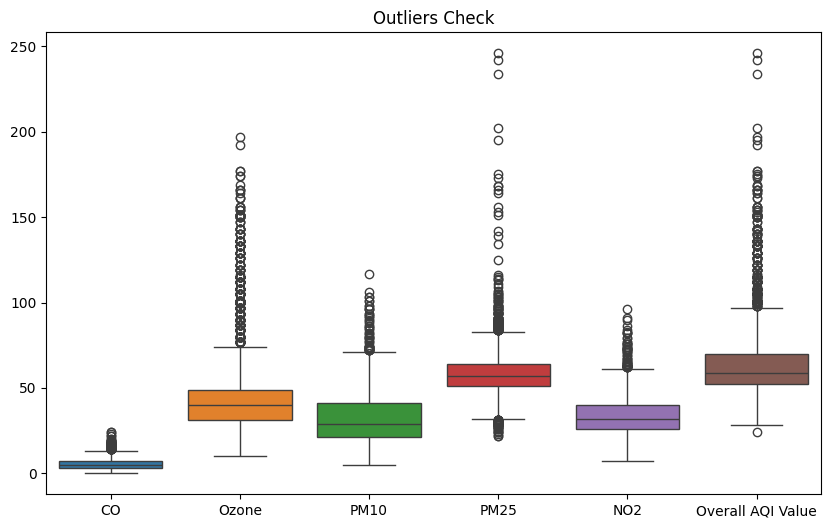

In [7]:
# Boxplot untuk setiap fitur
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['CO', 'Ozone', 'PM10', 'PM25', 'NO2', 'Overall AQI Value']])
plt.title('Outliers Check')
plt.show()

Berdasarkan gambar di atas, terdapat outlier yang ditunjukkan dengan adanya titik-titik yang berada di luar batas whisker (garis vertikal yang menunjukkan jangkauan data non-outlier) pada masing-masing boxplot untuk setiap fitur, seperti CO, Ozone, PM10, PM25, NO2, dan Overall AQI Value. Outlier ini menunjukkan data yang berada jauh dari rentang nilai mayoritas.

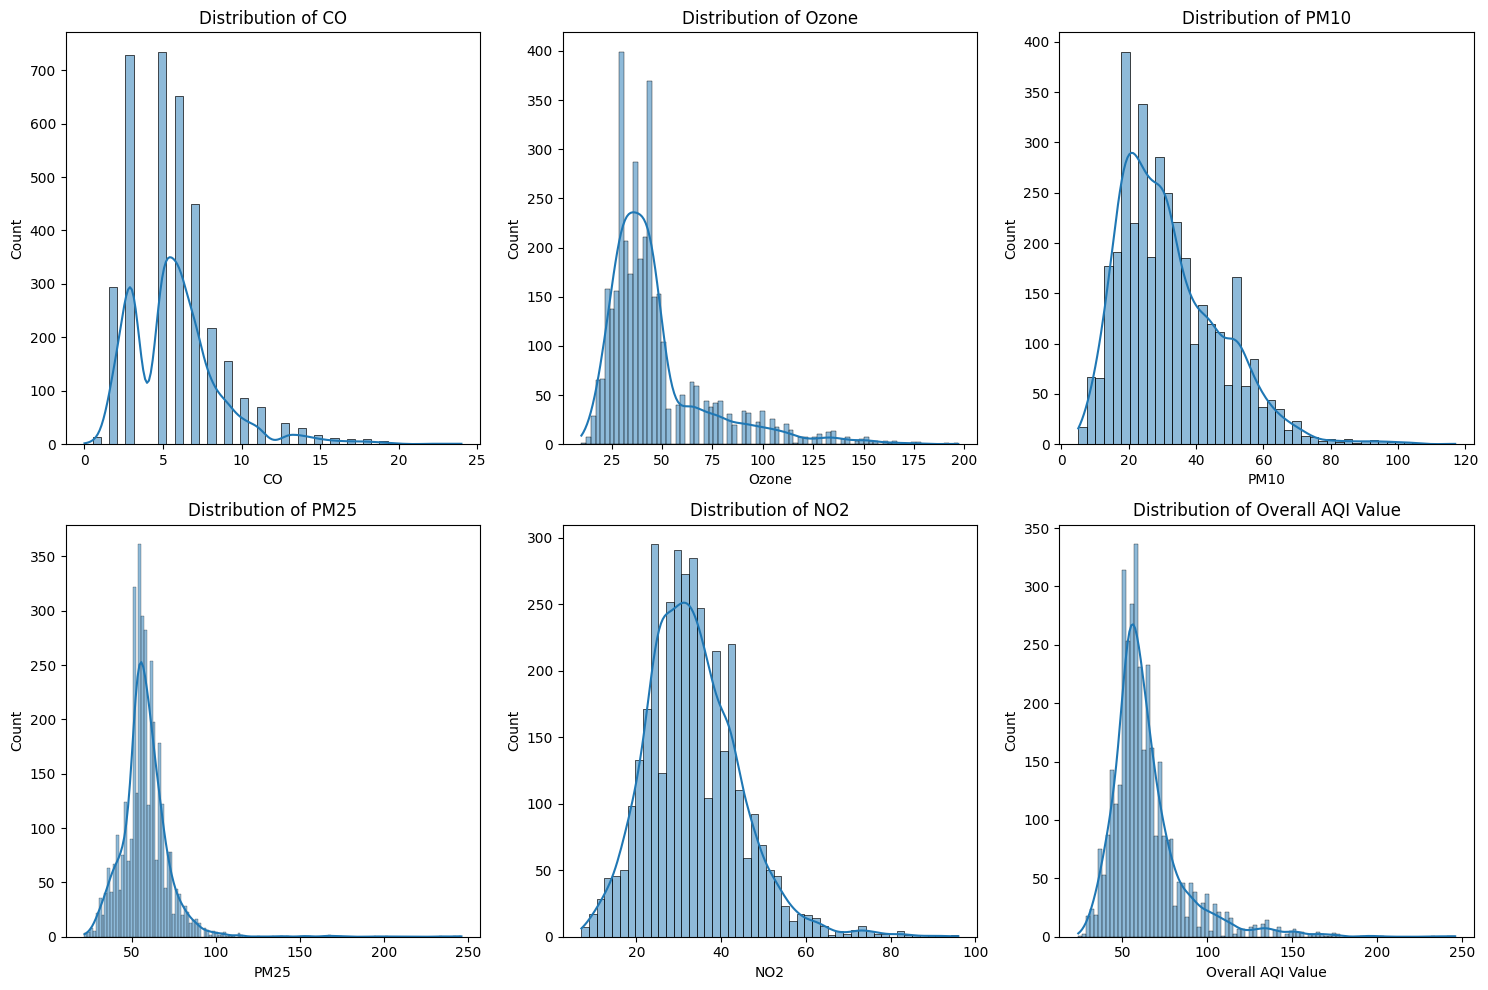

In [12]:
# Menyiapkan grid 
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# List kolom yang ingin divisualisasikan
columns = ['CO', 'Ozone', 'PM10', 'PM25', 'NO2', 'Overall AQI Value']

# Mengatur tampilan subplot
for i, col in enumerate(columns):
    ax = axes[i // 3, i % 3]  
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

# Menyesuaikan layout
plt.tight_layout()
plt.show()


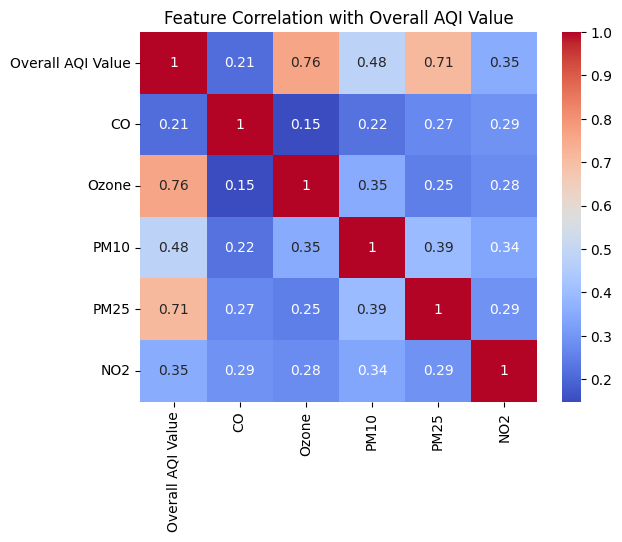

In [9]:
# Korelasi fitur dengan AQI
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Overall AQI Value')
plt.show()

Gambar di atas menunjukan Korelasi data. Korelasi data adalah ukuran yang menunjukkan sejauh mana dua variabel atau lebih berhubungan satu sama lain. Semakin kuat korelasi maka nilai koefisien akan mendekati 1 atau bernilai 1.

# Data Preprocessing

## Handling Missing Value

Pada tahap ini, data yang memiliki missing value diisi dengan metode interpolasi berdasarkan waktu. Hal ini dilakukan agar pola temporal tetap terjaga.

In [10]:
df.interpolate(method='time', inplace=True)  # Interpolasi berdasarkan waktu

# Mengecek missing values
print(df.isnull().sum())

Overall AQI Value    0
CO                   0
Ozone                0
PM10                 0
PM25                 0
NO2                  0
dtype: int64


## Handling Outliers

Outlier di data dapat mengganggu proses pelatihan model. Disini saya menangani outlier dengan metode clipping menggunakan quantile untuk memastikan data berada dalam rentang yang wajar.

In [11]:
df['PM25'] = np.clip(df['PM25'], df['PM25'].quantile(0.01), df['PM25'].quantile(0.99))
df['Overall AQI Value'] = np.clip(df['Overall AQI Value'], df['Overall AQI Value'].quantile(0.01), df['Overall AQI Value'].quantile(0.99))
df['Ozone'] = np.clip(df['Ozone'], df['Ozone'].quantile(0.01), df['Ozone'].quantile(0.99))
df['PM10'] = np.clip(df['PM10'], df['PM10'].quantile(0.01), df['PM10'].quantile(0.99))


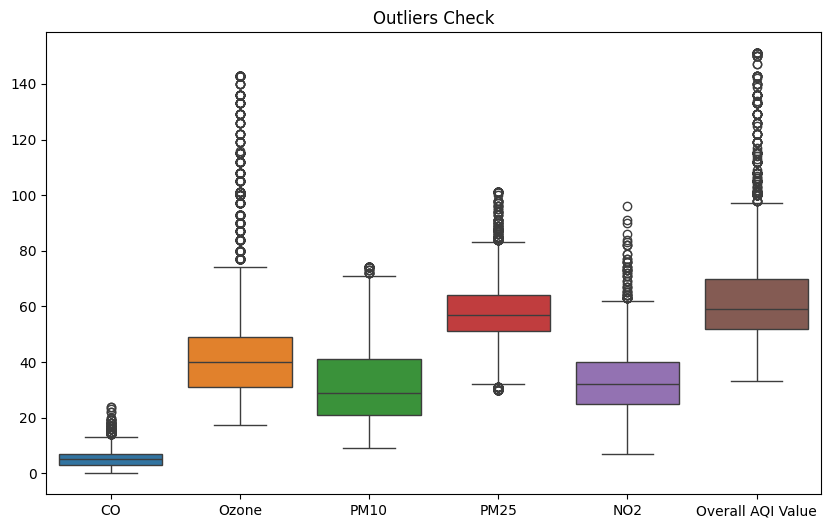

In [12]:
# Boxplot untuk setiap fitur
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['CO', 'Ozone', 'PM10', 'PM25', 'NO2', 'Overall AQI Value']])
plt.title('Outliers Check')
plt.show()

## Normalisasi Data

Normalisasi data diperlukan untuk menyamakan skala setiap fitur sehingga model dapat belajar dengan lebih efektif.

In [13]:
def normalize_series(data, min, max):
    # Normalisasi data dengan formula (data - min) / (max - min)
    data = (data - min) / (max - min)
    return data

In [14]:
data =df.values

data_norm = normalize_series(data, data.min(axis=0), data.max(axis=0))
data_norm

array([[0.13559322, 0.20833333, 0.06899021, 0.15384615, 0.26760563,
        0.16853933],
       [0.22881356, 0.375     , 0.06899021, 0.15384615, 0.42253521,
        0.4494382 ],
       [0.3220339 , 0.375     , 0.        , 0.24615385, 0.57746479,
        0.26966292],
       ...,
       [0.16101695, 0.20833333, 0.04511817, 0.32307692, 0.30985915,
        0.17977528],
       [0.05084746, 0.20833333, 0.05307552, 0.24615385, 0.12676056,
        0.17977528],
       [0.07627119, 0.20833333, 0.03716082, 0.15384615, 0.16901408,
        0.17977528]])

## Split Data

Dataset dibagi menjadi data pelatihan dan validasi untuk melatih model dan memantau performanya pada data yang tidak dilihat selama pelatihan. Dataset dibagi menjadi dua bagian, yaitu data latih (80%) dan data validasi (20%).

In [15]:
split_time = int(len(data_norm) * 0.8)

x_train = data_norm[:split_time]
x_valid = data_norm[split_time:]

print('train : ', len(x_train))
print('validation : ', len(x_valid))

train :  2907
validation :  727


# Modeling

Sebelum membuat model, terlebih dahulu membuat function windowed dataset yang nantinya digunakan untuk menangkap pola temporal dari data deret waktu. Data historis digunakan untuk memprediksi nilai di masa depan.

In [16]:
def windowed_dataset(series, batch_size, n_past=31, n_future=31, shift=1):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(size=(n_past + n_future), shift = shift, drop_remainder = True)
    ds = ds.flat_map(lambda w: w.batch(n_past + n_future))
    ds = ds.shuffle(len(series))
    ds = ds.map(
        lambda w: (w[:n_past], w[n_past:])
    )
    return ds.batch(batch_size).prefetch(1)

Berikut adalah tahapan pendefinisian Parameter Dataset.

In [17]:
N_FEATURES = len(df.columns)
BATCH_SIZE = 64 
N_PAST = 7
N_FUTURE = 7 
SHIFT = 1 

Selanjutnya tahapan pemanggilan fungsi windowed_dataset. Fungsi ini digunakan untuk mengubah data deret waktu menjadi jendela (windows) untuk pelatihan.

In [18]:
train_set = windowed_dataset(series=x_train, 
                             batch_size=BATCH_SIZE,
                             n_past=N_PAST, 
                             n_future=N_FUTURE,
                             shift=SHIFT)

valid_set = windowed_dataset(series=x_valid, 
                             batch_size=BATCH_SIZE,
                             n_past=N_PAST, 
                             n_future=N_FUTURE,
                             shift=SHIFT)

Pada tahap ini merupakan proses membangun model deep learning berbasis LSTM untuk memprediksi data deret waktu. Model ini dilengkapi dengan layer konvolusi, dropout, dan dense untuk meningkatkan akurasi dan mencegah overfitting.

In [19]:
# Membuat model
model = tf.keras.models.Sequential([
    Conv1D(filters=32, 
            kernel_size=3,
            padding="causal",
            activation="relu",
            input_shape=[N_PAST, 6],
            ),
    Bidirectional(LSTM(32, return_sequences=True)),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dropout(0.3),
    Dense(8, activation="relu"),
    Dropout(0.1),
    Dense(N_FEATURES)
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 7, 32)             608       
                                                                 
 bidirectional (Bidirection  (None, 7, 64)             16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 7, 64)             4160      
                                                                 
 dropout (Dropout)           (None, 7, 64)             0         
                                                                 
 dense_1 (Dense)             (None, 7, 32)             2080      
                                                                 
 dropout_1 (Dropout)         (None, 7, 32)             0         
                                                       

Pada tahap compile menggunakan optimizer Adam dengan learning rate kecil untuk stabilitas pelatihan dan fungsi loss MAE untuk menangani perbedaan skala data.

In [20]:
# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mae', optimizer=optimizer, metrics=['mae'])

Berukut merupakan tahapan training model dengan 100 epoch dan menggunakan callback ModelCheckpoint untuk menyimpan model terbaik berdasarkan validasi loss.

In [21]:
# ModelCheckpoint
cp_path = 'model/my_model.h5'
checkpoint = ModelCheckpoint(cp_path, save_weights_only=True, save_best_only=True, monitor='val_loss', verbose=1)

In [23]:
# Training
history = model.fit(train_set, 
                validation_data=valid_set, 
                epochs=100, 
                callbacks=[checkpoint])

Epoch 1/100


     46/Unknown - 9s 15ms/step - loss: 0.2869 - mae: 0.2869
Epoch 1: val_loss improved from inf to 0.26829, saving model to model\my_model.h5
46/46 [==============================] - 12s 69ms/step - loss: 0.2869 - mae: 0.2869 - val_loss: 0.2683 - val_mae: 0.2683
Epoch 2/100
43/46 [===========================>..] - ETA: 0s - loss: 0.2684 - mae: 0.2684
Epoch 2: val_loss improved from 0.26829 to 0.25018, saving model to model\my_model.h5
46/46 [==============================] - 1s 21ms/step - loss: 0.2682 - mae: 0.2682 - val_loss: 0.2502 - val_mae: 0.2502
Epoch 3/100
42/46 [==========================>...] - ETA: 0s - loss: 0.2582 - mae: 0.2582
Epoch 3: val_loss improved from 0.25018 to 0.24353, saving model to model\my_model.h5
46/46 [==============================] - 1s 19ms/step - loss: 0.2577 - mae: 0.2577 - val_loss: 0.2435 - val_mae: 0.2435
Epoch 4/100
42/46 [==========================>...] - ETA: 0s - loss: 0.2523 - mae: 0.2523
Epoch 4: val_loss improved from 0.24353 t

# Evaluations

Pada tahap ini, model dievaluasi menggunakan metrik Mean Absolute Error (MAE) untuk menghitung rata-rata kesalahan absolut antara prediksi model dan nilai sebenarnya. Metrik ini dipilih karena cocok untuk data deret waktu.

In [24]:
model.evaluate(valid_set)

12/12 [==============================] - 0s 9ms/step - loss: 0.1250 - mae: 0.1250


[0.1249721348285675, 0.1249721348285675]

Pada tahap ini, dilakukan visualisasi metrik loss (training loss dan validation loss) selama proses pelatihan. Hal ini membantu kita untuk memantau performa model, mendeteksi overfitting, atau underfitting.

Training loss (MAE)   :  0.11522477120161057
Validation loss (MAE) :  0.12497211992740631


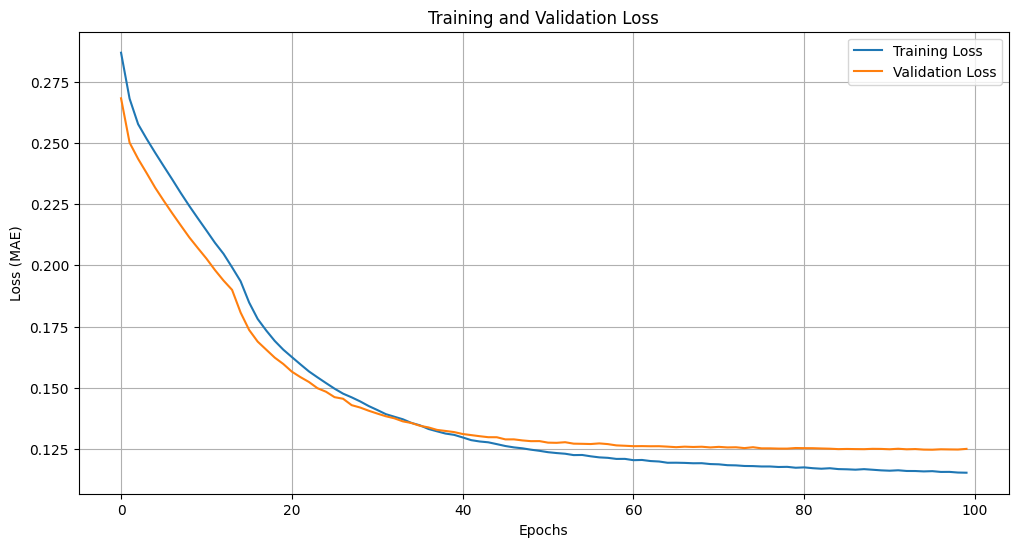

In [26]:
print('Training loss (MAE)   : ', history.history['mae'][-1])
print('Validation loss (MAE) : ', history.history['val_mae'][-1])

# Visualisasi evaluasi pelatihan
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training Loss')
plt.plot(history.history['val_mae'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


Training loss (MAE): 0.11522477120161057 Ini berarti bahwa kesalahan rata-rata model pada data pelatihan adalah sekitar 0.1152 unit. Nilai ini menggambarkan seberapa akurat model dalam memprediksi data pelatihan.

Validation loss (MAE): 0.12497211992740631 Ini menunjukkan kesalahan rata-rata model pada data validasi adalah sekitar 0.1250 unit. Nilai ini menunjukkan seberapa baik model dapat menggeneralisasi terhadap data yang tidak dilihat sebelumnya (data validasi).